In [1]:
# !pip3 install folium
# !pip3 install sklearn
import numpy as np
import pandas as pd
import folium
import requests
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.preprocessing import StandardScaler

In [2]:
CLIENT_ID = 'LVQ521WZ0ZVT1LNDBDI4FEC4TH5GTPFUJ3IQT21HTNJN4QUO'
CLIENT_SECRET = 'PUZJSH44LO0PW3S5BX4ISNSN1GBPBX0T55NBO4ELRQFTRAUA'
VERSION = '20180605'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LVQ521WZ0ZVT1LNDBDI4FEC4TH5GTPFUJ3IQT21HTNJN4QUO
CLIENT_SECRET:PUZJSH44LO0PW3S5BX4ISNSN1GBPBX0T55NBO4ELRQFTRAUA


In [ ]:
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
            
# make the GET request
results = requests.get(url).json()['response']['categories']
results

In [27]:
results[0]

{'categories': [{'categories': [],
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
    'suffix': '.png'},
   'id': '56aa371be4b08b9a8d5734db',
   'name': 'Amphitheater',
   'pluralName': 'Amphitheaters',
   'shortName': 'Amphitheater'},
  {'categories': [],
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/aquarium_',
    'suffix': '.png'},
   'id': '4fceea171983d5d06c3e9823',
   'name': 'Aquarium',
   'pluralName': 'Aquariums',
   'shortName': 'Aquarium'},
  {'categories': [],
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/arcade_',
    'suffix': '.png'},
   'id': '4bf58dd8d48988d1e1931735',
   'name': 'Arcade',
   'pluralName': 'Arcades',
   'shortName': 'Arcade'},
  {'categories': [],
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/artgallery_',
    'suffix': '.png'},
   'id': '4bf58dd8d48988d1e2931735',
   'name': 'Art Gallery',
   'pluralNam

In [16]:
results[0]['categories']

[{'categories': [],
  'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
   'suffix': '.png'},
  'id': '56aa371be4b08b9a8d5734db',
  'name': 'Amphitheater',
  'pluralName': 'Amphitheaters',
  'shortName': 'Amphitheater'},
 {'categories': [],
  'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/aquarium_',
   'suffix': '.png'},
  'id': '4fceea171983d5d06c3e9823',
  'name': 'Aquarium',
  'pluralName': 'Aquariums',
  'shortName': 'Aquarium'},
 {'categories': [],
  'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/arcade_',
   'suffix': '.png'},
  'id': '4bf58dd8d48988d1e1931735',
  'name': 'Arcade',
  'pluralName': 'Arcades',
  'shortName': 'Arcade'},
 {'categories': [],
  'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/artgallery_',
   'suffix': '.png'},
  'id': '4bf58dd8d48988d1e2931735',
  'name': 'Art Gallery',
  'pluralName': 'Art Galleries',
  'shortName': 'Art 

In [28]:
results[0]['name']

'Arts & Entertainment'

In [29]:
results[0]['categories'][0]['name']

'Amphitheater'

In [31]:
len(results[0]['categories'][0]['categories'])

0

In [36]:
# max = 1
# cur = results
# depth = 1
for cat in results:
    print(cat['name'], len(cat['categories']))

Arts & Entertainment 36
College & University 23
Event 12
Food 91
Nightlife Spot 7
Outdoors & Recreation 62
Professional & Other Places 41
Residence 5
Shop & Service 145
Travel & Transport 34


In [37]:
for cat in results[7]['categories']:
    print(cat['name'])

Assisted Living
Home (private)
Housing Development
Residential Building (Apartment / Condo)
Trailer Park


In [38]:
for cat in results[2]['categories']:
    print(cat['name'])

Christmas Market
Conference
Convention
Festival
Line / Queue
Music Festival
Other Event
Parade
Sporting Event
Stoop Sale
Street Fair
Trade Fair


In [39]:
for cat in results[4]['categories']:
    print(cat['name'])

Bar
Brewery
Lounge
Night Market
Nightclub
Other Nightlife
Strip Club


In [35]:
print(results[3]['categories'][16])

{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'categories': []}


In [40]:
categories = []
for cat in results:
    subcats = cat['categories']
    for subcat in subcats:
        categories.append(subcat['name'])
categories

['Amphitheater',
 'Aquarium',
 'Arcade',
 'Art Gallery',
 'Bowling Alley',
 'Casino',
 'Circus',
 'Comedy Club',
 'Concert Hall',
 'Country Dance Club',
 'Disc Golf',
 'Exhibit',
 'General Entertainment',
 'Go Kart Track',
 'Historic Site',
 'Karaoke Box',
 'Laser Tag',
 'Memorial Site',
 'Mini Golf',
 'Movie Theater',
 'Museum',
 'Music Venue',
 'Pachinko Parlor',
 'Performing Arts Venue',
 'Pool Hall',
 'Public Art',
 'Racecourse',
 'Racetrack',
 'Roller Rink',
 'Salsa Club',
 'Samba School',
 'Stadium',
 'Theme Park',
 'Tour Provider',
 'Water Park',
 'Zoo',
 'College Academic Building',
 'College Administrative Building',
 'College Auditorium',
 'College Bookstore',
 'College Cafeteria',
 'College Classroom',
 'College Gym',
 'College Lab',
 'College Library',
 'College Quad',
 'College Rec Center',
 'College Residence Hall',
 'College Stadium',
 'College Theater',
 'Community College',
 'Fraternity House',
 'General College & University',
 'Law School',
 'Medical School',
 'Sorori

In [41]:
'Neighborhood' in categories

False

In [42]:
len(categories)

456

In [43]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000, limit=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            v['venue']['name'], 
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Venue', 
                  'Venue Category']
    
    return(nearby_venues)

In [91]:
mytown = getNearbyVenues(['My Hometown'],[49.2827],[-123.1207])
mytown

,Neighborhood,Venue,Venue Category
0,My Hometown,Hawksworth Restaurant,Lounge
1,My Hometown,Rosewood Hotel Georgia,Hotel
2,My Hometown,Commodore Ballroom,Concert Hall
3,My Hometown,Hubbub Sandwiches,Sandwich Place
4,My Hometown,Victoria's Secret,Lingerie Store
5,My Hometown,Vancouver Art Gallery,Art Gallery
6,My Hometown,Wedgewood Hotel,Hotel
7,My Hometown,Disney store,Toy / Game Store
8,My Hometown,Indigospirit,Bookstore
9,My Hometown,Hyatt Regency Vancouver,Hotel


In [92]:
full_cat = pd.DataFrame({'Venue Category' : categories})
full_cat
new_mytown = pd.concat([mytown, full_cat], ignore_index = True)
new_mytown
test_onehot = pd.get_dummies(new_mytown[['Venue Category']], prefix="", prefix_sep="")
test_onehot[:-len(categories)]

,ATM,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,...,Waterfall,Waterfront,Wedding Hall,Well,Windmill,Wine Bar,Winery,Wings Joint,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
hist = test_onehot[:-len(categories)].sum()
hist

ATM                              0
Adult Boutique                   0
Afghan Restaurant                0
African Restaurant               0
Airport                          0
American Restaurant              2
Amphitheater                     0
Animal Shelter                   0
Antique Shop                     0
Aquarium                         0
Arcade                           0
Art Gallery                      1
Art Studio                       0
Arts & Crafts Store              0
Asian Restaurant                 0
Assisted Living                  0
Astrologer                       0
Athletics & Sports               0
Auditorium                       0
Australian Restaurant            0
Austrian Restaurant              0
Auto Dealership                  0
Auto Garage                      0
Auto Workshop                    0
Automotive Shop                  0
BBQ Joint                        0
Baby Store                       0
Bagel Shop                       0
Baggage Locker      

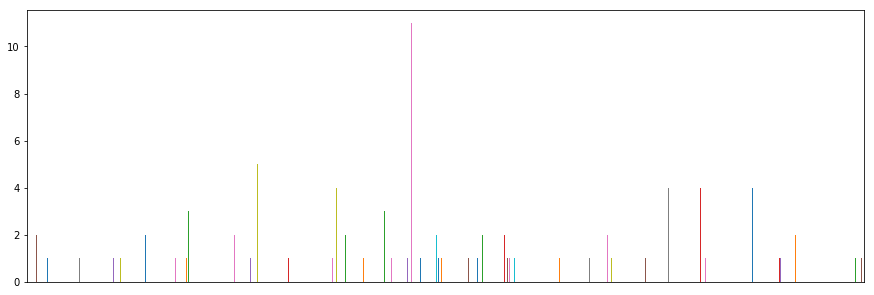

In [94]:
hist.plot(kind='bar', figsize=(15,5))
plt.xticks([])
plt.show()

In [68]:
def getNeighborOnehot(neighborhoods, venue_categories):
    neighborhoods = neighborhoods.append(pd.Series(['Dummy'] * len(categories)))
    print(neighborhoods)
    venue_categories = venue_categories.append(pd.Series(categories), ignore_index = True)
    print(venue_categories)
    neigh_onehot = pd.get_dummies(pd.DataFrame({'Category': venue_categories}), prefix="", prefix_sep="")
    neigh_onehot.insert(0, 'Neighborhood', neighborhoods)
    return neigh_onehot

res = getNeighborOnehot(mytown['Neighborhood'], mytown['Venue Category'])
res

0      My Hometown
1      My Hometown
2      My Hometown
3      My Hometown
4      My Hometown
5      My Hometown
6      My Hometown
7      My Hometown
8      My Hometown
9      My Hometown
10     My Hometown
11     My Hometown
12     My Hometown
13     My Hometown
14     My Hometown
15     My Hometown
16     My Hometown
17     My Hometown
18     My Hometown
19     My Hometown
0            Dummy
1            Dummy
2            Dummy
3            Dummy
4            Dummy
5            Dummy
6            Dummy
7            Dummy
8            Dummy
9            Dummy
          ...     
426          Dummy
427          Dummy
428          Dummy
429          Dummy
430          Dummy
431          Dummy
432          Dummy
433          Dummy
434          Dummy
435          Dummy
436          Dummy
437          Dummy
438          Dummy
439          Dummy
440          Dummy
441          Dummy
442          Dummy
443          Dummy
444          Dummy
445          Dummy
446          Dummy
447         

ValueError: cannot reindex from a duplicate axis

In [57]:
res.shape

(20, 20)